加载需要用到的python库

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

random_state = 424

%matplotlib inline

加载数据集

In [24]:
dataset_root = Path('dataset')
train_path = dataset_root / 'train'
test_path = dataset_root / 'test'
csv_path = dataset_root / 'driver_imgs_list.csv'

# 读取csv文件
dataset = pd.read_csv(csv_path)

# 查看csv文件的前5项
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [36]:
driver_list = dataset['subject'].unique()
count_subject = len(driver_list)
count_train_img = len(dataset['img'])
print('amount of diver: {}'.format(count_subject))
print('amount of train img: {}'.format(count_train_img))

amount of diver: 26
amount of train img: 22424


我们可以看到被标注的图片总数有2万多张，但是司机的数量只有26位。也就是说，如果随机分割训练集和验证集，会出现过拟合的现象，为了更好的训练和评估模型，我选择按照司机来分割训练集和验证集，接下来，我们看一下数据集的分布。

Text(0.5,0,'amount of images')

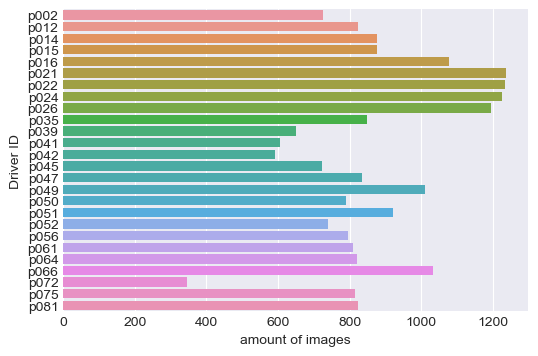

In [26]:
sns.set_style('darkgrid')
'''
img_per_subject = dataset.groupby('subject')['img'].count()
bar_positions = np.arange(400,1400,100)
plt.hist(img_per_subject)
'''
plt.figure(dpi=100)
fig = sns.countplot(y='subject', data=dataset)
fig.set_ylabel('Driver ID')
fig.set_xlabel('amount of images')

Mean: 2242.4
Standard Deviation: 175.39


Text(0.5,0,'class name')

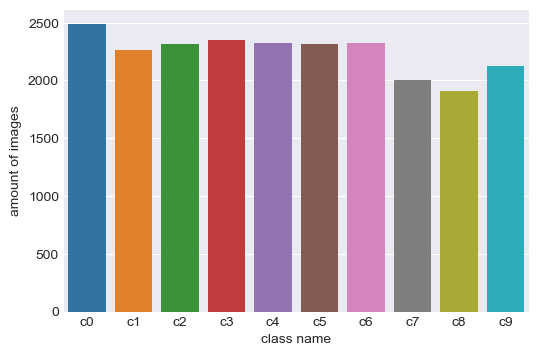

In [34]:
count_img_byClass = dataset.groupby('classname')['img'].count()
plt.figure(dpi=100)
print('Mean: {}'.format(count_img_byClass.mean()))
print('Standard Deviation: {:.2f}'.format(count_img_byClass.std()))
fig = sns.countplot(x='classname', data=dataset)
fig.set_ylabel('amount of images')
fig.set_xlabel('class name')

In [46]:
path1 = dataset.sample()['img']
print(path1.values)

['img_7091.jpg']


In [86]:
def display_dataset_byClass():
    image_list = []
    for i in range(10):
        classname = 'c' + str(i)
        item = dataset[dataset['classname']==classname].sample(random_state=random_state)
        image = dataset_root / 'train' / classname / item['img'].values[0]
        image_list.append(str(image))
    plt.figure(figsize=(20,20))
   
    for i in range(10):
        plt.subplot(4, 3, i+1)
        # 读取图片
        img =cv2.imread(image_list[i], 1)
        # cv2以BGR形式保存 ->Matplotlib以RGB保存
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title('c' + str(i))
        plt.axis('off')
        plt.imshow(img)

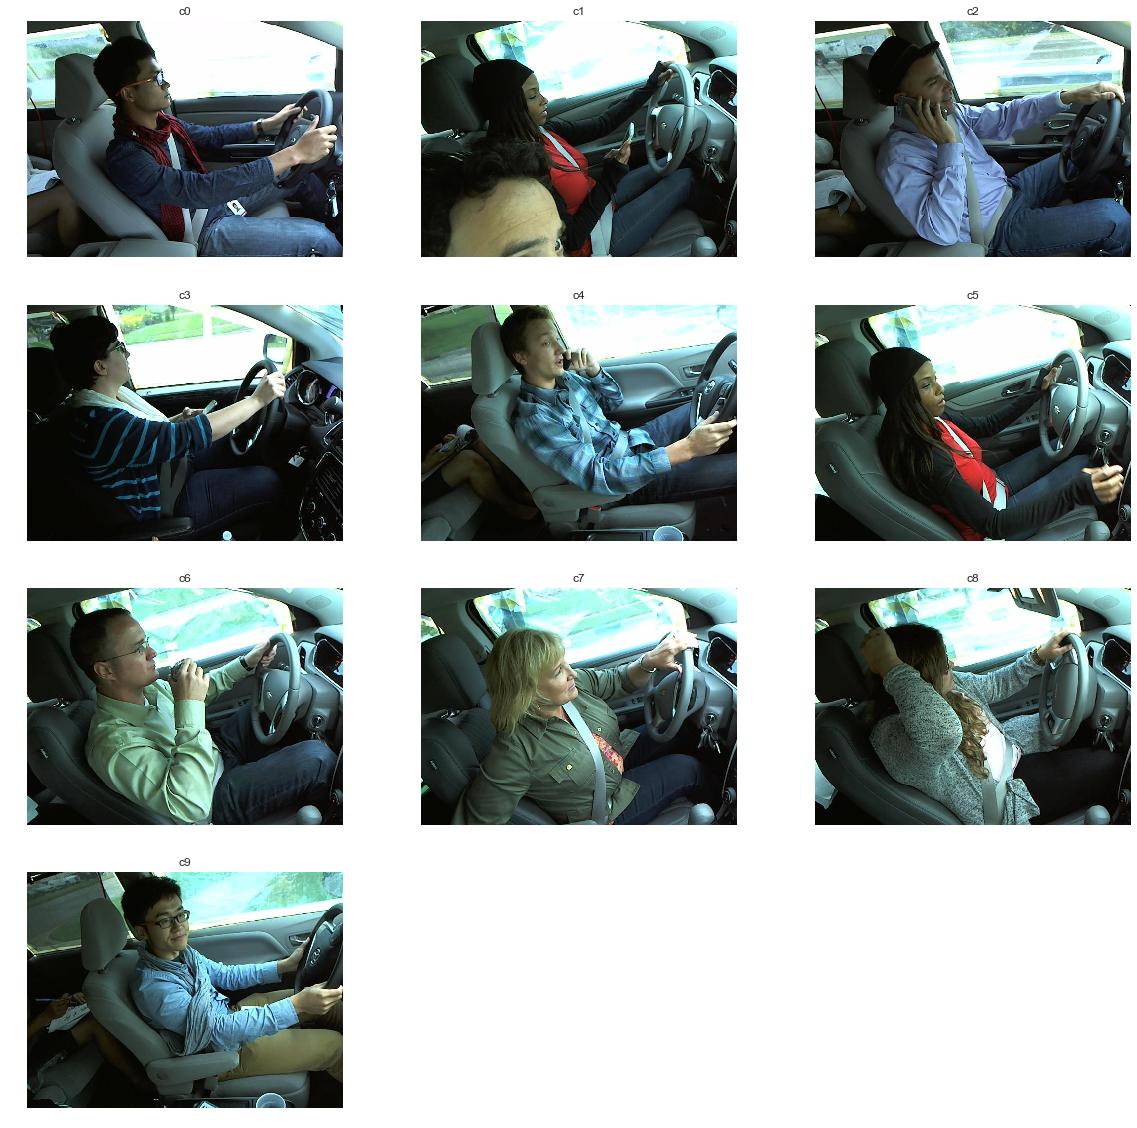

In [87]:
display_dataset_byClass()